# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요.

In [7]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# 한글 세팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [9]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [11]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [12]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.

data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [13]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)

data.shape # 12000명 고객 , 21개의 컬럼 

(12000, 21)

In [14]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
print(data.columns)
print(data.shape[0])
print(data.dtypes)

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')
12000
CID                          int64
AGE                          int64
등록(계/피)                     object
고용상태                        object
성별                           int64
Willingness to pay/Stay    float64
갱신                           int64
상품타입                        object
교육수준                        object
소득                           int64
지역                          object
결혼여부                        object
월 납입액                        int64
VOC                          int64
타 상품 보유 현황                  object
온라인방문빈도                     object
갱신인센티브                      object
판매채널                        object
총지불금액                        int64
자동차                         object
거주지사이즈                      object
dtype: object


In [15]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [16]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns


Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [21]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
anal_columns = ['AGE','고용상태','교육수준','상품타입','거주지사이즈','자동차']
data[anal_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
 5   자동차     12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [24]:
def my_count_plot(target):
    sns.countplot(x=target,data=data)
    plt.title(target)
    plt.grid()
    plt.show()
    print(data[target].value_counts(normalize = True).sort_index())

In [25]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [27]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

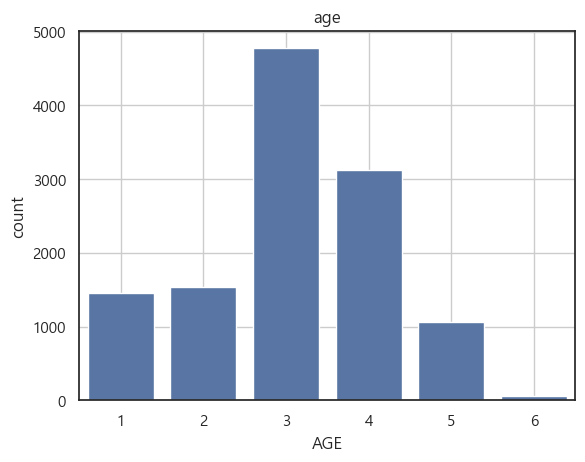

In [28]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data)
plt.title('age')
plt.grid()
plt.show()

### 2) 고용상태

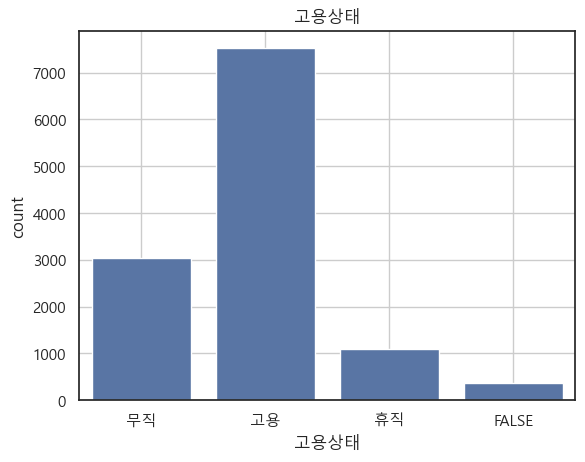

In [30]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.

target  = '고용상태'
sns.countplot(x=target,data=data)
plt.title(target)
plt.grid()
plt.show()

In [31]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data[target].value_counts(normalize = True).sort_index()


고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64

In [32]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

# (양정우의 의견)false는 계약직이 아닐까? 특히 계약 만료가 얼마 안남은 사람 


<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


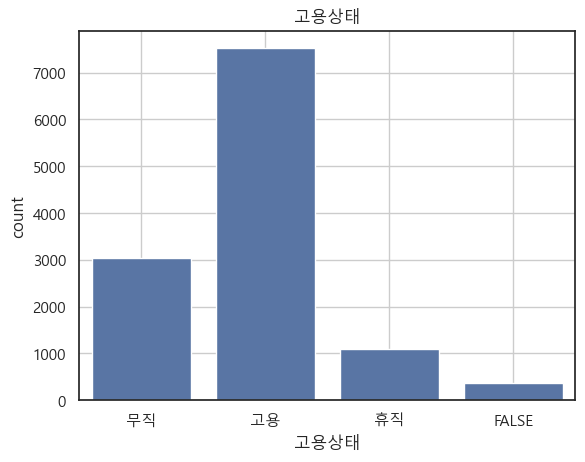

고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64


In [34]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!
target = '고용상태'
my_count_plot(target)

### 3) 교육수준

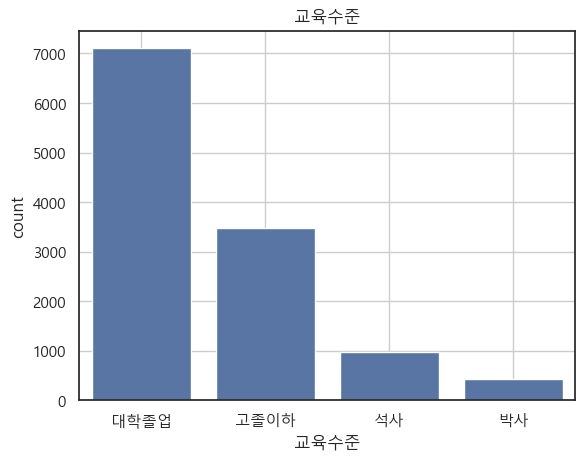

교육수준
고졸이하    0.289750
대학졸업    0.592083
박사      0.036583
석사      0.081583
Name: proportion, dtype: float64


In [36]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.

#[문제 13] 위 결과에 대해 비율로 계산해보자.

#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!
target = '교육수준'
my_count_plot(target)

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [38]:
# 대체로 대졸자 비율이 높음 , 석사와 박사 합쳐보면 10% 비율을 차지함 

### 4) 상품타입

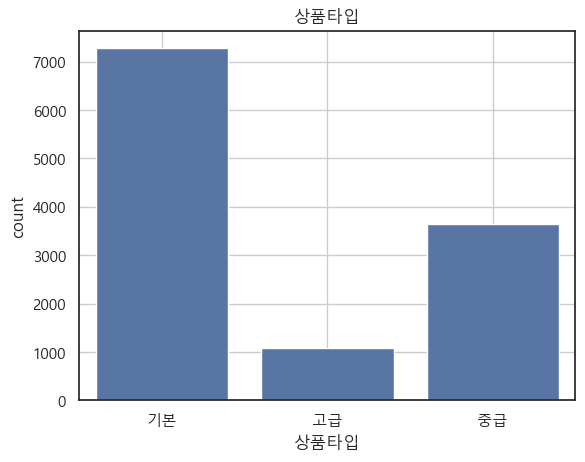

상품타입
고급    0.089583
기본    0.606500
중급    0.303917
Name: proportion, dtype: float64


In [40]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
target = '상품타입'
my_count_plot(target)


<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [42]:
# 기본 , 중급 보험을 가입한 고객이 대부분 , 고급 상품타입을 선택한 비중이 적은것을 보아 충성고객일 거같음
# 마케팅 전략은 기본, 중급 고객들을 대상으로 연관 등급 상품을 더 가입하도록 독려 

### 5) 거주지사이즈

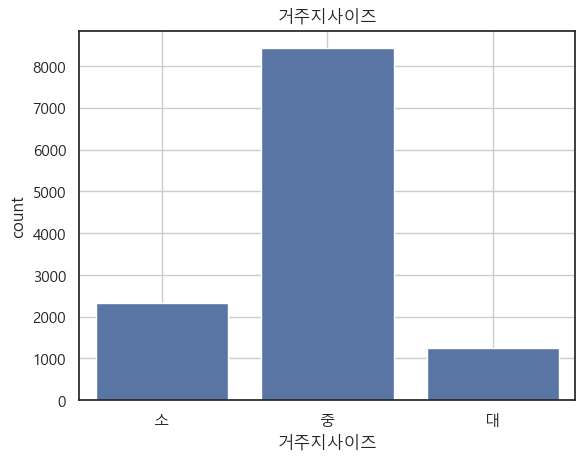

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64


In [44]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
target = '거주지사이즈'
my_count_plot(target)


<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [46]:
# '중' 거주지 비중이 많음 , 
# 소 , 중 ,대  거주지사이즈를 구분한 기준이 뭔지 알 필요가 있음 ( N평 이하 , N 평 이상)

### 6) 자동차

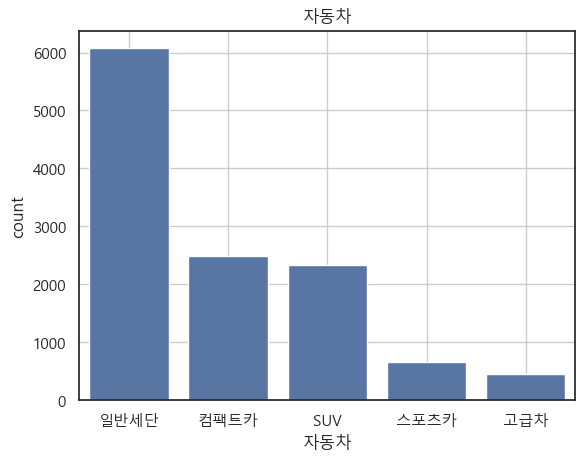

자동차
SUV     0.194667
고급차     0.037833
스포츠카    0.054333
일반세단    0.506167
컴팩트카    0.207000
Name: proportion, dtype: float64


In [48]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
target = '자동차'
my_count_plot(target)


<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [50]:
# 일반 세단 , 컴팩트카 , SUV 자동차의 비중이 많음

# 고급차 , 스포츠카를 구매한 비율은  8% 

# (양정우의 의견) 고급차 스포츠카를 구매한 사람은 특별히 자동차 관련 보험을 가입했을 거 같음 
# (확인할 것)  스포츠카 + 고급차 를 구매한 고객이 (1) 챠량용 보험을 가입했는가? (2) 가입했다면 그 등급은 어떤가?
# (마케팅전략)  1. 가장 높은 차량 캐어 보험상품을 가입하도록 독려 

 


## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [52]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
major_columns = ['Willingness to pay/Stay','소득','월 납입액','타 상품 보유 현황','총지불금액']
data[major_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


In [54]:
def my_hist_plot(target ,b= 30):
    plt.figure(figsize=(12,8))
    sns.histplot(data[target],bins=b,kde=True)
    plt.grid()
    plt.show()
    print(data[[target]].describe().T)

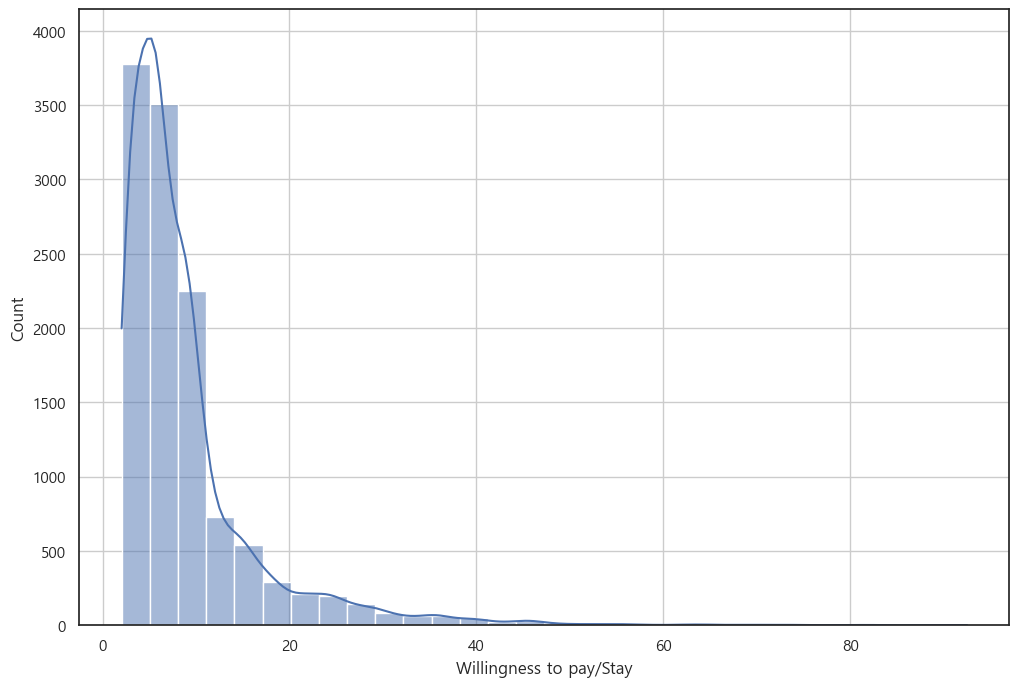

In [55]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [57]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
feature = 'Willingness to pay/Stay'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
Willingness to pay/Stay,12000.0,8.859478,7.698885,2.04573,4.3734,6.384831,9.8679,92.4963


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [59]:
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

In [61]:
feature ='소득'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
소득,12000.0,46417371.85,3.736221e+07,0.0,0.0,41862400.0,76641500.0,132020900.0


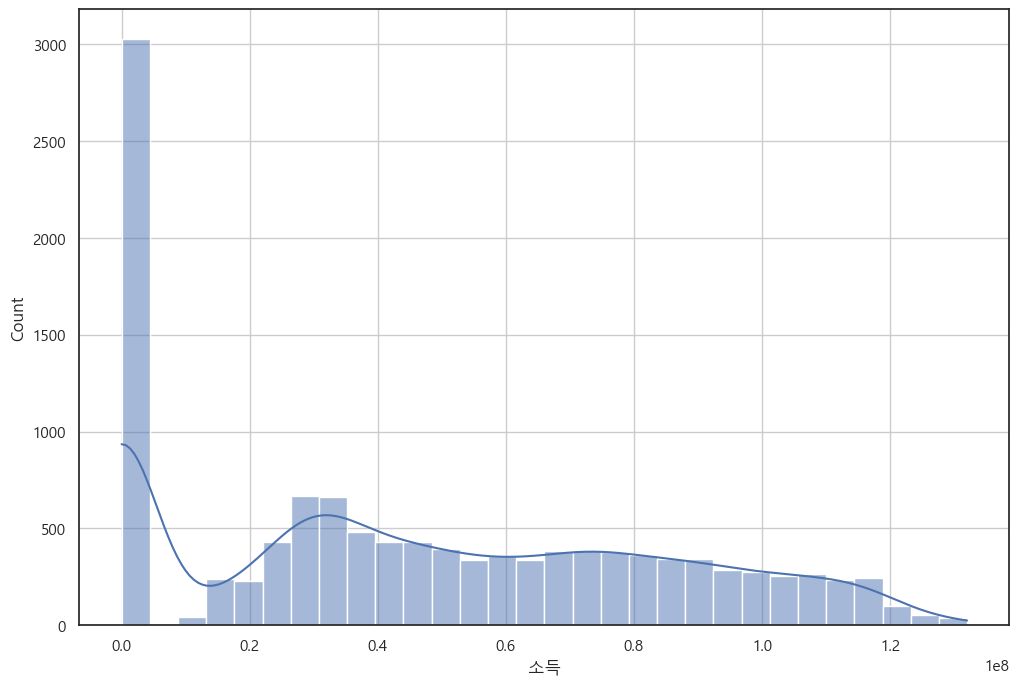

      count         mean           std  min  25%         50%         75%  \
소득  12000.0  46417371.85  3.736221e+07  0.0  0.0  41862400.0  76641500.0   

            max  
소득  132020900.0  


In [62]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
target = '소득'
my_hist_plot(target)


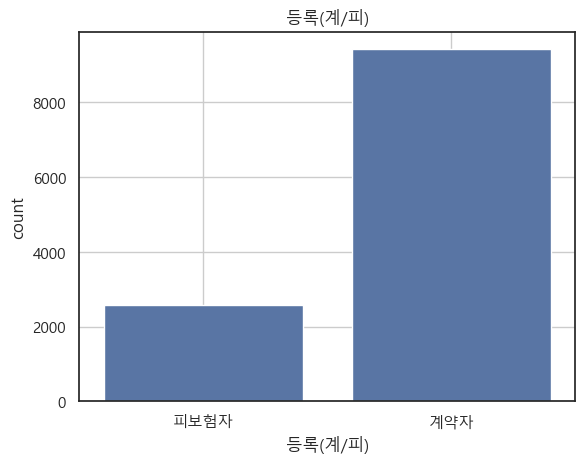

등록(계/피)
계약자     0.785417
피보험자    0.214583
Name: proportion, dtype: float64


In [63]:
target = '등록(계/피)'
my_count_plot(target)


<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [65]:
# 소득 격차가 분포는 소득이 0~7000만원 인 고객이 전체 75%를 차지하고 있음 , 
# 특히 소득이 0인 사람이 많은데  아마 가족 연동 보험 자녀들(피보험인) 이라 소득이 없는걸로 추정됨 

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

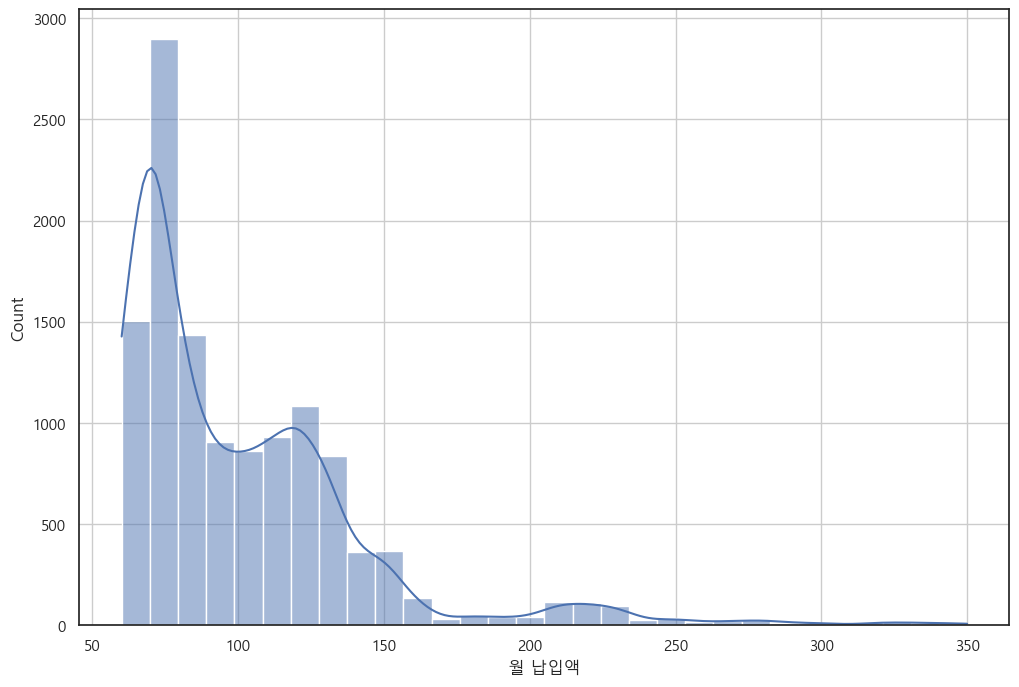

         count        mean       std   min   25%   50%    75%    max
월 납입액  12000.0  100.065833  42.45375  60.0  70.0  90.0  120.0  350.0


In [67]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
# bins = 30, kde = True로 설정해서 한번 보자

target = '월 납입액'

my_hist_plot(target)


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [69]:
# 평균 월 납입액은 100만원 이하에 많이 분포해 있음 
# 350만원 << 고급 보험  + 스포츠카, 고급차 보유 인 고객일 것 같음 

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

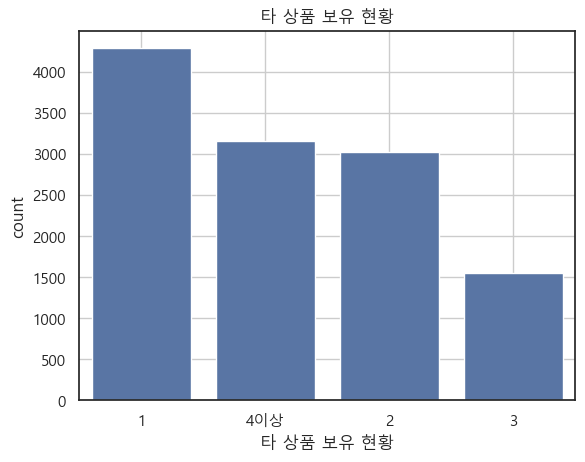

타 상품 보유 현황
1      0.356917
2      0.251417
3      0.128750
4이상    0.262917
Name: proportion, dtype: float64


In [71]:
target ='타 상품 보유 현황'
my_count_plot(target)

In [72]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.
pd.crosstab(data['타 상품 보유 현황'], data['자동차'] , normalize='columns')
# 

자동차,SUV,고급차,스포츠카,일반세단,컴팩트카
타 상품 보유 현황,,,,,
1,0.353168,0.405286,0.338957,0.356931,0.356280
2,0.263699,0.218062,0.265337,0.243662,0.261272
3,0.143408,0.083700,0.116564,0.134837,0.111514
4이상,0.239726,0.292952,0.279141,0.264570,0.270934


In [73]:
pd.crosstab(data['타 상품 보유 현황'], data['고용상태'] , normalize='columns')

고용상태,FALSE,고용,무직,휴직
타 상품 보유 현황,,,,
1,0.391667,0.358872,0.347754,0.357404
2,0.297222,0.249800,0.250661,0.249543
3,0.116667,0.131551,0.120211,0.137112
4이상,0.194444,0.259777,0.281374,0.255941


In [74]:
pd.crosstab(data['타 상품 보유 현황'], data['교육수준'] , normalize='columns')

교육수준,고졸이하,대학졸업,박사,석사
타 상품 보유 현황,,,,
1,0.340523,0.362139,0.378132,0.367722
2,0.254242,0.253483,0.200456,0.249234
3,0.138050,0.124279,0.102506,0.139939
4이상,0.267184,0.260099,0.318907,0.243105


In [75]:
pd.crosstab(data['타 상품 보유 현황'], data['거주지사이즈'] , normalize='columns')

거주지사이즈,대,소,중
타 상품 보유 현황,,,
1,0.402410,0.339194,0.355099
2,0.235341,0.240995,0.256678
3,0.118072,0.145798,0.125608
4이상,0.244177,0.274014,0.262614


<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [77]:
# 타 상품 보유 비율은 1개 > 4개 = 2개 > 3개 순이다 
# 왜 3개를 보유한 고객이 수가 가장 적을까? > 보험 패키지의 구성때문인 것 같음 , 강하게 연관된 보험상품이 1개~ 2개 , 4개로 구성되어았음 

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

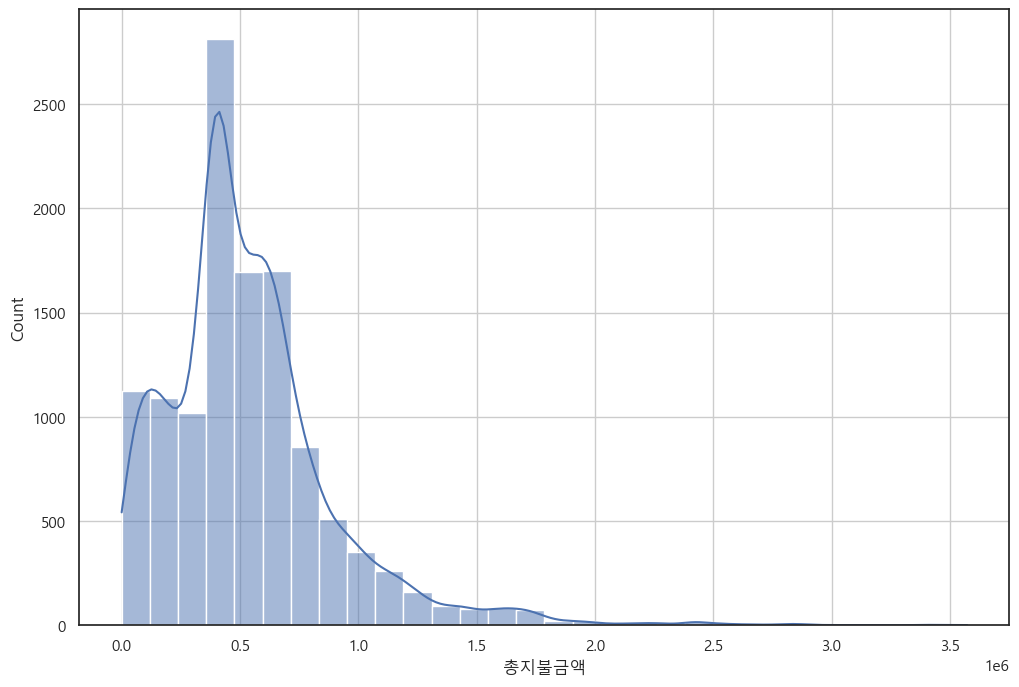

         count           mean            std  min       25%       50%  \
총지불금액  12000.0  535585.416667  358799.286205  0.0  336000.0  474000.0   

            75%        max  
총지불금액  679000.0  3573000.0  


In [79]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
target = '총지불금액'
my_hist_plot(target)


In [80]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)



<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [82]:
# 총 지불금액 평균은 50만원 , 최대 357만원 

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

## (옵션) 다변량 분석 수행

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

In [300]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    
    sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()

    '''
    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])# i가 0, 1, 2,...로 증가하는데, 이 인덱스가 feature의 실제 고유값과 일치하지 않을 수 있음
    '''
    #feature 컬럼의 실제 고유값을 사용하여 그룹을 생성
    unique_vals = df[feature].unique()
    an_list = [df.loc[df[feature] == val, target].dropna() for val in unique_vals]  # 결측치 처리 추가

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

def mosaic_plot(df, feature, target, cmap='Pastel1'):
    # crosstab으로 데이터 생성
    data = pd.crosstab(df[feature], df[target]).stack()

    # feature 값별로 색상을 통일하고 target 값에 따라 채도만 다르게 설정
    unique_features = df[feature].unique()
    colors = sns.color_palette(cmap, len(unique_features))
    color_dict = {val: colors[i] for i, val in enumerate(unique_features)}
    
    # props 설정
    props = {}
    for idx in data.index:
        feature_val, target_val = idx
        base_color = color_dict[feature_val]
        props[idx] = {'color': base_color}

    # Mosaic plot 생성
    fig, ax = plt.subplots(figsize=(8, 6))
    mosaic(data, properties=props, ax=ax)

    # 구분 선을 진한 검은색으로 설정
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    plt.title(f"Mosaic Plot of {feature} vs {target}")
    plt.show()




def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    plt.rcParams['font.family'] = 'Malgun Gothic'
    mosaic_plot(df,feature,target)
    #plt.axhline(1- df[target].mean(), color = 'r')
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])
    
    
    
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()


- (연속형)
1. Willingness to Pay/Stay 보험 유지 기대확률(연속형)
2. 소득
3. 월 납입액
4. 총 지불 금액
   
                        
- (범주형)
1. age
2. 고용상태
3. 교육수준
4. 상품타입
5. 서주지사이즈
6. 자동차
7. 타 상품 보유 현황

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

## 1. 모든 연속형 변수들 간 상관관계 확인

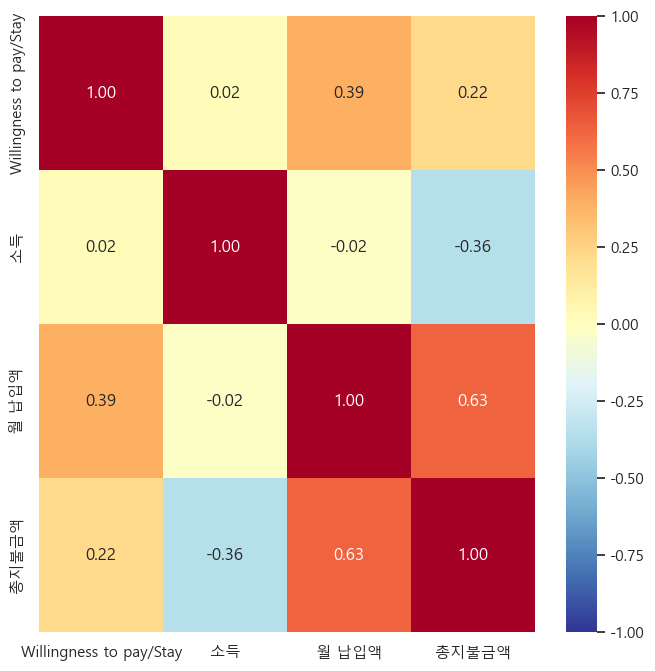

In [255]:
# 모든 연속형 변수들 간의 상관관계 확인 
numerical_numerical_hitmap(data[['Willingness to pay/Stay','소득','월 납입액','총지불금액' ]])


- 월 납입액 - 총지불금액은 높은 (0.5이상) 양의 상관관계가 있음  > 매달 보험료를 지불금액이 많을 수록 치료비 지급이 높음
- 
- Willingness to Pay/Stay 와 월 납입액 , 총 지불금액은 양의 상관관계가 존재 >>  매달 , 총 지불 보험계약금이 높을수록 보험을 유지할 가능성이 높음 , 치료비 지원비를 많이 받은 고객일수록 계약을 유지할 확률이높

- 소득 - 치료비 지급액은 음의 상관관계가 있음 >> 월급을 많이 받는 사람들은 보험 치료비를 많이 받지 않음 (월급이 많으니까 고액의 치료비를 지급하는 보험에 가입하지 않음 )

- 

## 2. 범주형(feature) - 연속형(target)간 관계확인

C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


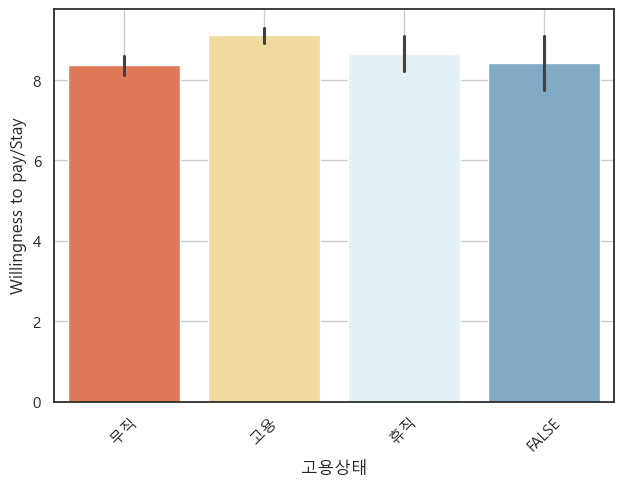

ANOVA 결과: F-statistic = 7.465334848393585, p-value = 5.447305274016952e-05


In [259]:
# 
target = 'Willingness to pay/Stay'
feature = '고용상태'
categorical_numerical(data, feature , target)

In [260]:
# 고용 상태는 보험유지 기대 확률에 유의미한 영향을 주지 않음  (자유도 대비 F-score 3~5배 이상 )


C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


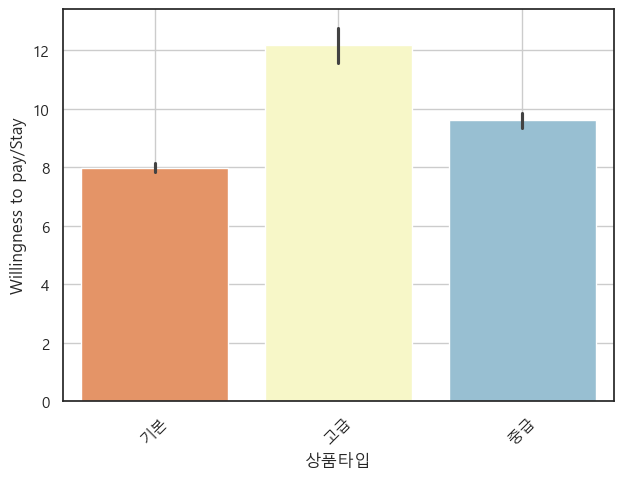

ANOVA 결과: F-statistic = 169.77790568339978, p-value = 1.952395854031448e-73


In [261]:
feature = '상품타입'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [262]:
# 상품 타입 이 보험 유지에 큰 영향을 줌 (자유도 대비 F-score 3~5배 이상 )
# 고급 , 중급 , 기본 순으로 보험을 유지할 확률이 높음 
# (제안) 고급 보험상품을 가입한 고객은  잡아놓은 물고기라고 생각함 , 기본 등급 보험상품 고객의 이탈을 막던지, 중급 이상의 삼품을 구매하도록 전략을 세울수 있을듯 



C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


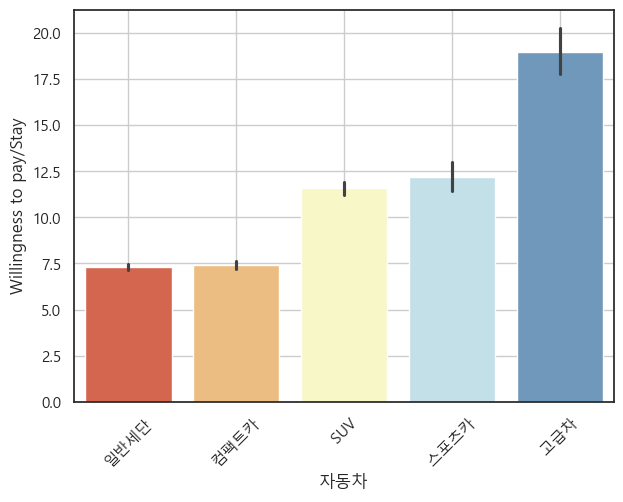

ANOVA 결과: F-statistic = 438.11027145476993, p-value = 0.0


In [263]:
feature = '자동차'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [266]:
# 상품 타입 이 보험 유지에 큰 영향을 줌 (자유도 대비 F-score 3~5배 이상 )
# 고급 , 중급 , 기본 순으로 보험을 유지할 확률이 높음 
# (제안) 고급 보험상품을 가입한 고객은  잡아놓은 물고기라고 생각함 , 기본 등급 보험상품 고객의 이탈을 막던지, 중급 이상의 삼품을 구매하도록 전략을 세울수 있을듯 

C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


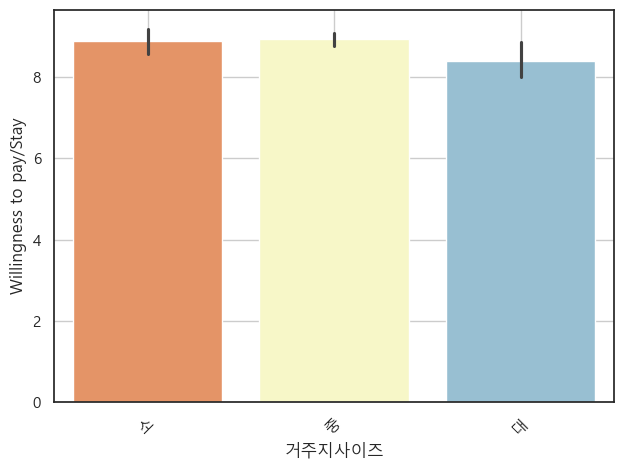

ANOVA 결과: F-statistic = 2.6390410469356613, p-value = 0.07147120098265375


In [267]:
# 거주지 사이즈   -  보험 유지 확률 
# 
feature = '거주지사이즈'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [268]:
# 거주지 사이즈는 보험 유지 확률에 유의미한 영향을 주지 않음 (자유도 대비 F-score 3~5배 이하 )
# 거주지사이즈 - 보험유지확률 연관성 x 


C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


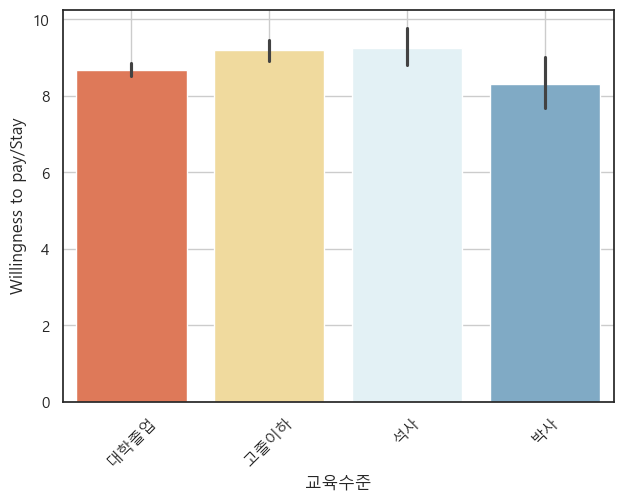

ANOVA 결과: F-statistic = 4.9658559134064415, p-value = 0.0019140545967984554


In [269]:
feature = '교육수준'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [272]:
# 교육수준은 보험 유지 확률에 유의미한 영향을 주지 않음 (자유도 대비 F-score 3~5배 이하 )


C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


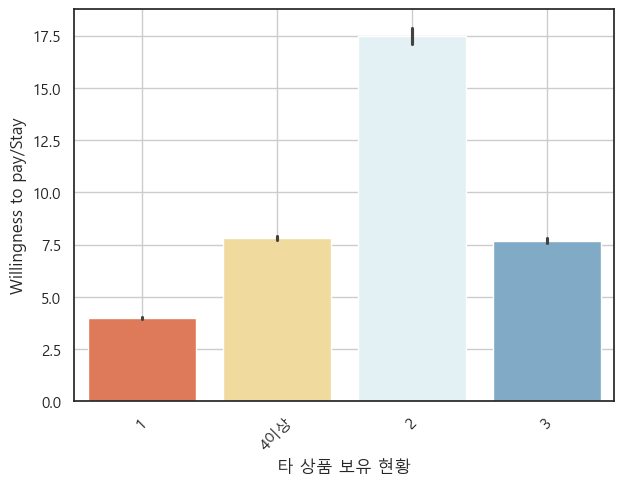

ANOVA 결과: F-statistic = 3501.2353609955726, p-value = 0.0


In [273]:
feature = '타 상품 보유 현황'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [274]:
# 타 상품 2개 이상 보유한 고객일 수록 보험을 유지할 확률이 높음  (유의미함)
# (제안) 보험 2개 이상 가입한 고객이면 > 잡아놓은 물고기  
# 보험 1개만 가입한 고객 대상으로 홍보 , 마케팅을 하면 될것 > 2개 이상 보험상품 구매하도록 



C:\Users\User\AppData\Local\Temp\ipykernel_20008\906832122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')


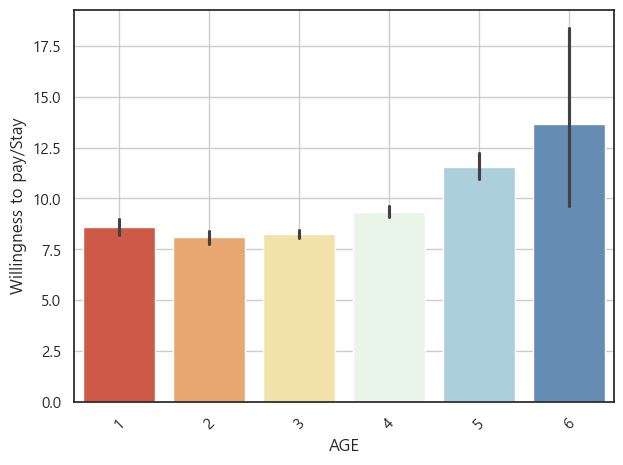

ANOVA 결과: F-statistic = 42.96606040537418, p-value = 4.793313715709697e-44


In [275]:
feature = 'AGE'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

## 3. 범주형() - 범주형() 관계확인 

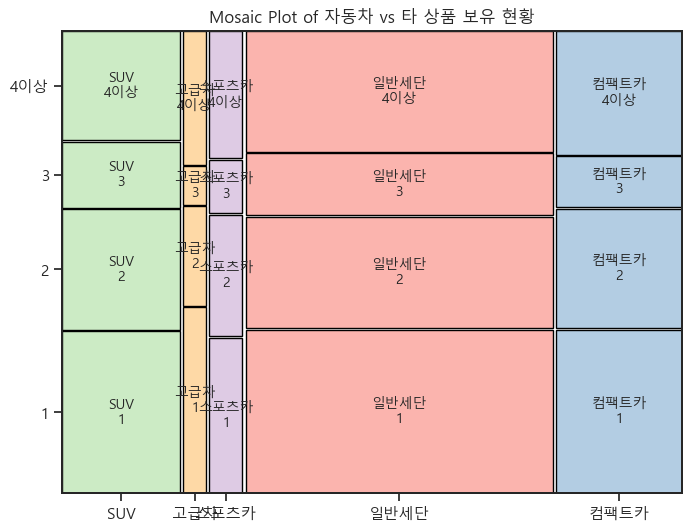

교차표
 자동차         SUV  고급차  스포츠카  일반세단  컴팩트카
타 상품 보유 현황                            
1           825  184   221  2168   885
2           616   99   173  1480   649
3           335   38    76   819   277
4이상         560  133   182  1607   673
카이제곱통계량 36.93127443707495
p-value 0.00022921090290393397
자유도 12


In [302]:
# 1. 자동차 고급 - 타 상품 보유 현황 , 상품 타입   3가지 변수간 연관성이 있을거 같음 (추측)

feature = '자동차'
target ='타 상품 보유 현황'
categorical_categorical(data,feature , target)



In [163]:
# 자유도 대비 카이제곱 통계량이 5배 이상이 아님 (유의미하지 않음 )


In [ ]:
feature = '자동차'
target ='상품타입'
categorical_categorical(data,feature , target)

## 4.결론 


1. 40대 이하 고객 이탈확률 > 50대 이상 고객 이탈 확률
2. 1개 타 상품 보유 고객 이탈 확률 > 2개 이상 타 상품 고객 이탈확률
3. 일반 세단 , 컴팩트카 보유고객의 이탈확률 > 스포츠카 , 고급차 , SUV 보유 고객의 이탈 확률
4. 기본 , 중급 등급의 보험상품 고객의 이탈 확률 > 고급 보험상품 고객 이탈 확률
5. 매달 , 총 지불 보험계약금이 높을수록 보험을 유지할 가능성이 높음 , 치료비 지원비를 많이 받은 고객일수록 계약을 유지할 확률이높